# Reducción de dimensionalidad - PCA

## 1. Arreglo de Features "A mano"

Ya hemos comentado que el tema de reducción de dimensionalidad peude pensarse como una parte del preprocesamiento, es decir, se mejoran los atributos a introducir a un modelo posteriormente. También, sirve en una etapa exploratoria, ya que reduciendo la cantidad de atributos (típicamente a dos) es más fácil visualizar un dataset. Esto era algo que aprendimos a hacer "a mano" al princio del segundo bloque, cuando inspeccionábamos y seleccionábamos los atributos que correlacionaban con la etiqueta de interés.

A continuación les mostramos un ejemplo de un problema donde selecionamos a mano una combinación de atributos que mejora el rendimiento de un modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

In [ ]:
data = pd.read_csv('DS_Bitácora_32_datosPCA.csv', index_col = 0)
data.head()

,x1,x2,y
0,3.204922,2.204922,-1.000000
1,-2.124616,-3.116584,-0.991968
2,1.380153,0.396217,-0.983936
3,1.988312,1.012408,-0.975904
4,3.044791,2.076919,-0.967871


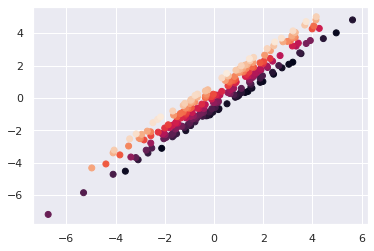

In [ ]:
plt.scatter(data['x1'], data['x2'], c = data['y'])
plt.show()

Notar que las etiquetas crecen en una dirección "a 45 grados" con respecto a los atributos. Si exploramos la correlación entre ellos y las etiquetas (`y`), notamos que ninguna de las dos está correlacionada a este valor.

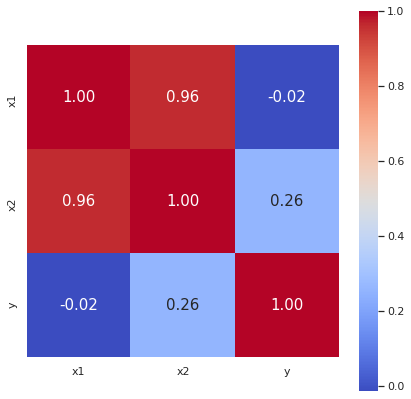

In [ ]:
corr = data.corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')

plt.show()

Notar que los features están altamente correlacionados entre sí y poco correlacionados con la etiqueta `y` que queremos predecir. Esto nos podría hacer creer que este dataset es de mala calidad, que `x1`, `x2` no guardan una relación con con `y`.

Vamos a entrenar un árbol de decisión para predecir el valor de `y`.

In [ ]:
X = data[['x1', 'x2']].values
y = data['y'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regresor = DecisionTreeRegressor(max_depth=2)
regresor.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_train_pred = regresor.predict(X_train)
y_test_pred = regresor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))


0.2692180499083255
0.28699492277686467


Notemos que el modelo no es muy bueno. Sin embargo, la información para poder predecir está en los datos y el modelo usado podría ser mucho mejor. El problema viene porque no realizamos una transformación de datos adecuada antes de alimentar el modelo.

Agreguemos un nuevo atributos, que sea la resta de las anteriores. Esto lo sabemos hacer porque generamos los datos, sino no sabríamos qué combinación usar. El truco de PCA, veremos luego, es que descubrirá solo qué tiene que hacer eso.

In [ ]:
data['x_nuevo'] = data['x2'] - data['x1']
X_new = data['x_nuevo'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)


In [ ]:
regresor = DecisionTreeRegressor(max_depth=1)
regresor.fit(X_train.reshape(-1,1),y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_train_pred = regresor.predict(X_train.reshape(-1,1))
y_test_pred = regresor.predict(X_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))


0.08055871811703007
0.09314442905377451


La predicción, con la misma profundidad en el modelo, mejoró un montón. ¿Qué sucedió? Primero veamos la relación entre el nuevo atributo y la etiqueta `y`.

Text(0, 0.5, 'y')

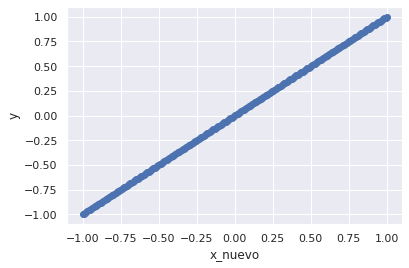

In [ ]:
plt.scatter(data['x_nuevo'], data['y'])
plt.xlabel('x_nuevo')
plt.ylabel('y')

Observá que ahora el nuevo atributo mantiene una relación lineal perfecta con `y`.

Y las correlaciones:

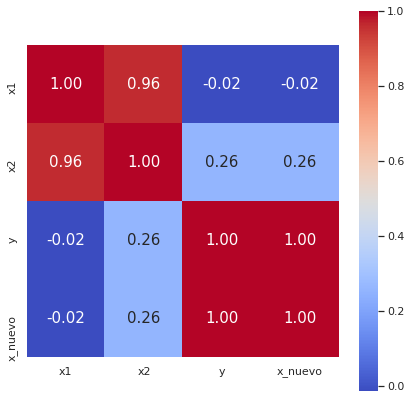

In [ ]:
corr = data.corr(method='pearson') # .corr is used for find corelation
plt.figure(figsize=(7,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')

plt.show()

Y también vemos que está perfectamente correlacionado con la etiqueta, no así con `x1` y `x2`.

**Conclusión:** con los mismos datos, pudimos predecir mucho mejor, ya que construimos un atributo mucho más adecuado para el problema.

## 2. Arreglo de Features automático

PCA nos puede ayudar a preparar automaticamente los atributos, por lo que no será necesario hacer "a mano" lo que hicimos en la sección anterior. Existen muchas implementaciones de PCA, utilizaremos la de Scikit-Learn. Es **importantísimo** que mires la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_nuevo = pca.fit_transform(X) 

¿Cómo son los nuevos atributos con respecto a los originales? Esto lo podemos ver a través del atributo `components_` de la clase `PCA`.

In [ ]:
pca.components_

array([[-0.69456703, -0.719428  ],
       [ 0.719428  , -0.69456703]])

Asegúrate de entender qué significa. 

Veamos como quedan los datos en este nuevo espacio de atributos.

Text(0, 0.5, 'X_nuevo[:,1]')

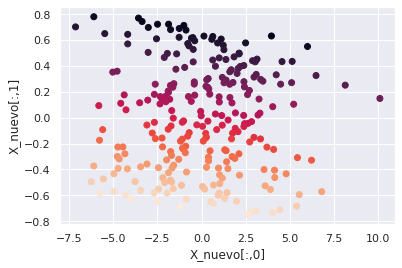

In [ ]:
plt.scatter(X_nuevo[:,0], X_nuevo[:,1], c = y)
plt.xlabel('X_nuevo[:,0]')
plt.ylabel('X_nuevo[:,1]')

Notar que ahora hay un atributo que esta muy correlacionado con la etiqueta (¿Te das cuenta cuál es? Si es necesario, realiza otro gráfico de dispersión, probando cada atributo nuevo contra `y`). Usamos ahora estos dos atributos como dataset y probamos nuevamente entrenar un modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

Usamos un arbol de profundidad 1 nuevamente.

In [ ]:
regresor2 = DecisionTreeRegressor(max_depth=1)
regresor2.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Notemos que el error que obtenemos usando estos dos nuevos features (obtenidos a través de PCA) es mucho menor al error que hubiesemos tenido si usábamos los features originales.

In [ ]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

0.08055871811703007
0.09314442905377451


Por último, podemos ver qué atributo fue más importante al momento de predecir.

In [ ]:
regresor2.feature_importances_

array([0., 1.])

¿A qué atributo corresponde la mayor importancia?¿Cómo se relaciona con lo que vimos en la primera sección?

## 3. ¡A probar con un dataset!

Toma lo que hiciste el encuentro pasado y compara la aplicación de SVD con PCA. ¿Son iguales?¿Son distintas? Si corresponde, ¿en qué se parecen y en qué se diferencian?